# Imports

In [2]:
from ctypes import *
import matplotlib.pyplot as plt
import numpy as np
path_to_shared_library = "D:/CLion/PA/lib_projet_annuel_machine_learning/target/debug/lib_projet_annuel_machine_learning.dll"
my_lib = cdll.LoadLibrary(path_to_shared_library)

In [3]:
#Fonctions Importés
def create_linear_model(my_lib, size):
    my_lib.create_linear_model.argtypes = [c_int]
    my_lib.create_linear_model.restype = POINTER(c_float)

    p_model = my_lib.create_linear_model(size)
    model = np.ctypeslib.as_array(p_model, (size + 1,))

    model_size = len(model)
    return p_model, model_size


def destroy_linear_model(my_lib, model, model_size):
    my_lib.destroy_linear_model.argtypes = [POINTER(c_float), c_int]
    my_lib.destroy_linear_model.restype = None
    my_lib.destroy_linear_model(model, model_size)


def predict_linear_model_classification(my_lib, model, model_size, inputs):
    inputs_float = [float(i) for i in inputs]
    inputs_type = len(inputs_float) * c_float

    my_lib.predict_linear_model_classification.argtypes = [POINTER(c_float),
                                                           inputs_type,
                                                           c_int]
    my_lib.predict_linear_model_classification.restype = c_float

    return my_lib.predict_linear_model_classification(model, inputs_type(*inputs_float), model_size)


def train_rosenblatt_linear_model(my_lib, model, model_size, dataset_inputs, dataset_expected_outputs, iteration_count,
                                  alpha):
    dataset_inputs_flattened_for_train = []
    for elt in dataset_inputs:
        dataset_inputs_flattened_for_train.append(float(elt[0]))
        dataset_inputs_flattened_for_train.append(float(elt[1]))
    dataset_inputs_flattened_for_train_type = len(dataset_inputs_flattened_for_train) * c_float
    dataset_expected_outputs_float = [float(i) for i in dataset_expected_outputs]
    dataset_expected_outputs_type = len(dataset_expected_outputs_float) * c_float

    my_lib.train_rosenblatt_linear_model.argtypes = [POINTER(c_float),
                                                     dataset_inputs_flattened_for_train_type,
                                                     dataset_expected_outputs_type,
                                                     c_int,
                                                     c_float,
                                                     c_int,
                                                     c_int]
    my_lib.train_rosenblatt_linear_model.restype = None

    my_lib.train_rosenblatt_linear_model(model,
                                         dataset_inputs_flattened_for_train_type(*dataset_inputs_flattened_for_train),
                                         dataset_expected_outputs_type(*dataset_expected_outputs_float),
                                         iteration_count, float(alpha), model_size,
                                         len(dataset_inputs_flattened_for_train))


def predict_linear_model_regression(my_lib, model, model_size, inputs):
    inputs_float = [float(i) for i in inputs]
    inputs_type = len(inputs_float) * c_float

    my_lib.predict_linear_model_regression.argtypes = [POINTER(c_float),
                                                       inputs_type,
                                                       c_int]
    my_lib.predict_linear_model_regression.restype = c_float

    return my_lib.predict_linear_model_regression(model, inputs_type(*inputs_float), model_size)


def train_regression_linear_model(my_lib, model, model_size, dataset_inputs, dataset_expected_outputs):
    dataset_inputs_float = [float(i) for i in dataset_inputs]
    dataset_inputs_type = len(dataset_inputs_float) * c_float
    dataset_expected_outputs_float = [float(i) for i in dataset_expected_outputs]
    dataset_expected_outputs_type = len(dataset_expected_outputs_float) * c_float

    my_lib.train_regression_linear_model.argtypes = [POINTER(c_float),
                                                     dataset_inputs_type,
                                                     dataset_expected_outputs_type,
                                                     c_int,
                                                     c_int]
    my_lib.train_regression_linear_model.restype = None

    my_lib.train_regression_linear_model(model, dataset_inputs_type(*dataset_inputs_float),
                                         dataset_expected_outputs_type(*dataset_expected_outputs_float), model_size,
                                         len(dataset_inputs_float))


def create_mlp_model(my_lib, struct_model):
    struct_model_int = [int(i) for i in struct_model]
    struct_model_type = len(struct_model_int) * c_int

    my_lib.create_mlp_model.argtypes = [struct_model_type,
                                        c_int]
    my_lib.create_mlp_model.restype = POINTER(c_void_p)

    return my_lib.create_mlp_model(struct_model_type(*struct_model_int), len(struct_model_int))


def destroy_mlp_model(my_lib, model):
    my_lib.destroy_mlp_model.argtypes = [POINTER(c_void_p)]
    my_lib.destroy_mlp_model.restype = None
    my_lib.destroy_mlp_model(model)


def predict_mlp_model_classification(my_lib, model, inputs):
    inputs_float = [float(i) for i in inputs]
    inputs_type = len(inputs_float) * c_float

    my_lib.predict_mlp_model_classification.argtypes = [POINTER(c_void_p),
                                                        inputs_type,
                                                        c_int]
    my_lib.predict_mlp_model_classification.restype = POINTER(c_float)
    result_predict = my_lib.predict_mlp_model_classification(model, inputs_type(*inputs_float), len(inputs_float))

    return np.ctypeslib.as_array(result_predict, (1,))


def train_classification_stochastic_backprop_mlp_model(my_lib, model, dataset_inputs, dataset_expected_outputs, alpha,
                                                       iterations_count):
    dataset_inputs_flattened = []
    for elt in dataset_inputs:
        dataset_inputs_flattened.append(elt[0])
        dataset_inputs_flattened.append(elt[1])
    dataset_inputs_flattened_type = len(dataset_inputs_flattened) * c_float
    dataset_expected_outputs_float = [float(i) for i in dataset_expected_outputs]
    dataset_expected_outputs_type = len(dataset_expected_outputs_float) * c_float

    my_lib.train_classification_stochastic_backprop_mlp_model.argtypes = [POINTER(c_void_p),
                                                                          dataset_inputs_flattened_type,
                                                                          c_int,
                                                                          dataset_expected_outputs_type,
                                                                          c_int,
                                                                          c_float,
                                                                          c_int]
    my_lib.train_classification_stochastic_backprop_mlp_model.restype = None

    my_lib.train_classification_stochastic_backprop_mlp_model(model,
                                                              dataset_inputs_flattened_type(*dataset_inputs_flattened),
                                                              len(dataset_inputs_flattened),
                                                              dataset_expected_outputs_type(*dataset_expected_outputs_float),
                                                              len(dataset_expected_outputs_float),
                                                              alpha, iterations_count)



def predict_mlp_model_regression(my_lib, model, inputs):
    inputs_float = [float(i) for i in inputs]
    inputs_type = len(inputs_float) * c_float

    my_lib.predict_mlp_model_regression.argtypes = [POINTER(c_void_p),
                                                    inputs_type,
                                                    c_int]
    my_lib.predict_mlp_model_regression.restype = POINTER(c_float)
    result_predict = my_lib.predict_mlp_model_regression(model, inputs_type(*inputs_float), len(inputs_float))

    return np.ctypeslib.as_array(result_predict, (1,))


def train_regression_stochastic_backprop_mlp_model(my_lib, model, dataset_inputs, dataset_expected_outputs):
    dataset_inputs_float = [float(i) for i in dataset_inputs]
    dataset_inputs_type = len(dataset_inputs_float) * c_float
    dataset_expected_outputs_float = [float(i) for i in dataset_expected_outputs]
    dataset_expected_outputs_type = len(dataset_expected_outputs_float) * c_float

    my_lib.train_regression_stochastic_backprop_mlp_model.argtypes = [POINTER(c_void_p),
                                                                      dataset_inputs_type,
                                                                      c_int,
                                                                      dataset_expected_outputs_type,
                                                                      c_int,
                                                                      c_float,
                                                                      c_int]
    my_lib.train_regression_stochastic_backprop_mlp_model.restype = None

    my_lib.train_regression_stochastic_backprop_mlp_model(model,
                                                          dataset_inputs_type(*dataset_inputs_float),
                                                          len(dataset_inputs_float),
                                                          dataset_expected_outputs_type(*dataset_expected_outputs_float),
                                                          len(dataset_expected_outputs_float),
                                                          float(0.01), 100000)

def predict_mlp_model_classification_3_class(my_lib, model, inputs):
    inputs_float = [float(i) for i in inputs]
    inputs_type = len(inputs_float) * c_float

    my_lib.predict_mlp_model_classification.argtypes = [POINTER(c_void_p),
                                                        inputs_type,
                                                        c_int]
    my_lib.predict_mlp_model_classification.restype = POINTER(c_float)
    result_predict = my_lib.predict_mlp_model_classification(model, inputs_type(*inputs_float), len(inputs_float))

    return np.ctypeslib.as_array(result_predict, (3,))


def train_classification_stochastic_backprop_mlp_model_3_class(my_lib, model, dataset_inputs, dataset_expected_outputs,
                                                               alpha, iterations_count):
    dataset_inputs_float = [float(i) for i in dataset_inputs]
    dataset_inputs_flattened_type = len(dataset_inputs_float) * c_float
    dataset_expected_outputs_float = [float(i) for i in dataset_expected_outputs]
    dataset_expected_outputs_type = len(dataset_expected_outputs_float) * c_float

    my_lib.train_classification_stochastic_backprop_mlp_model.argtypes = [POINTER(c_void_p),
                                                                          dataset_inputs_flattened_type,
                                                                          c_int,
                                                                          dataset_expected_outputs_type,
                                                                          c_int,
                                                                          c_float,
                                                                          c_int]
    my_lib.train_classification_stochastic_backprop_mlp_model.restype = None

    my_lib.train_classification_stochastic_backprop_mlp_model(model,
                                                              dataset_inputs_flattened_type(*dataset_inputs_float),
                                                              len(dataset_inputs_float),
                                                              dataset_expected_outputs_type(*dataset_expected_outputs_float),
                                                              len(dataset_expected_outputs_float),
                                                              alpha, iterations_count)

# Cas de tests, rendu 2

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [185]:
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
Y = np.array([
      1,
      -1,
      -1
])

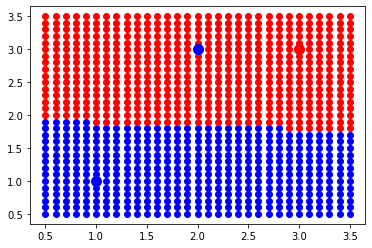

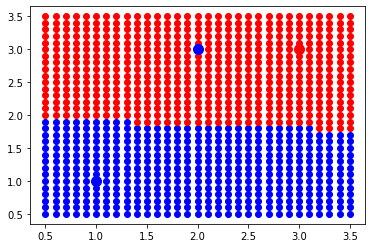

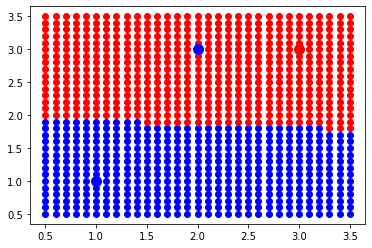

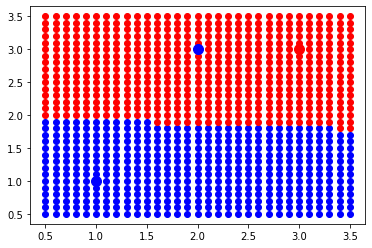

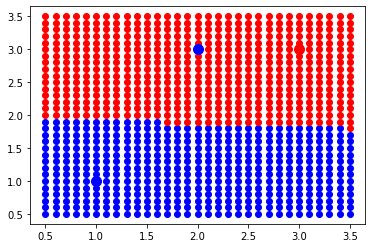

<Figure size 432x288 with 0 Axes>

In [199]:
# model, model_size = create_linear_model(my_lib, 2)

# train_rosenblatt_linear_model(my_lib, model, model_size, X, Y, 100, 0.1)

# points_x1_blue = []
# points_x2_blue = []

# points_x1_red = []
# points_x2_red = []
# for i in range(5, 36):
#     for j in range(5, 36):
#         if predict_linear_model_classification(my_lib, model, model_size, [i/10, j/10]) == 1.0:
#             points_x1_blue.append(i/10)
#             points_x2_blue.append(j/10)
#         else:
#             points_x1_red.append(i/10)
#             points_x2_red.append(j/10)

# plt.scatter(points_x1_blue, points_x2_blue, c='blue')
# plt.scatter(points_x1_red, points_x2_red, c='red')

# plt.scatter(X[0, 0], X[0, 1], color='blue', s=200)
# plt.scatter(X[1:3,0], X[1:3,1], color='red', s=200)
# plt.show()
# plt.clf()
# 
# destroy_linear_model(my_lib, model, model_size)

model = create_mlp_model(my_lib, [2, 1])

for _ in range(5):
    train_classification_stochastic_backprop_mlp_model(my_lib, model, X, Y, float(0.001), 100000)

    points_x1_blue = []
    points_x2_blue = []

    points_x1_red = []
    points_x2_red = []

    for i in range(5, 36):
        for j in range(5, 36):
            if predict_mlp_model_classification(my_lib, model, [i/10, j/10]) >= 0:
                points_x1_blue.append(i / 10.0)
                points_x2_blue.append(j / 10.0)
            else:
                points_x1_red.append(i / 10.0)
                points_x2_red.append(j / 10.0)

    plt.scatter(points_x1_blue, points_x2_blue, c='blue')
    plt.scatter(points_x1_red, points_x2_red, c='red')

    plt.scatter(X[0:2, 0], X[0:2, 1], color='blue', s=100)
    plt.scatter(X[2:4,0], X[2:4,1], color='red', s=100)
    plt.show()
    plt.clf()

destroy_mlp_model(my_lib, model)

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [184]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

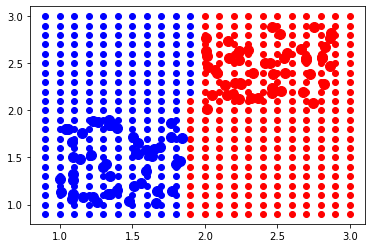

<Figure size 432x288 with 0 Axes>

In [73]:
model, model_size = create_linear_model(my_lib, 2)

train_rosenblatt_linear_model(my_lib, model, model_size, X, Y.flatten(), 10000, 0.01)

points_x1_blue = []
points_x2_blue = []

points_x1_red = []
points_x2_red = []
for i in range(9, 31):
    for j in range(9, 31):
        if predict_linear_model_classification(my_lib, model, model_size, [i/10, j/10]) == 1.0:
            points_x1_blue.append(i/10)
            points_x2_blue.append(j/10)
        else:
            points_x1_red.append(i/10)
            points_x2_red.append(j/10)

plt.scatter(points_x1_blue, points_x2_blue, c='blue')
plt.scatter(points_x1_red, points_x2_red, c='red')

plt.scatter(X[0:50, 0], X[0:50, 1], color='blue', s=100)
plt.scatter(X[50:100,0], X[50:100,1], color='red', s=100)
plt.show()
plt.clf()

destroy_linear_model(my_lib, model, model_size)

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [144]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

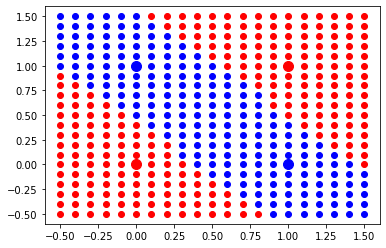

<Figure size 432x288 with 0 Axes>

In [145]:
model = create_mlp_model(my_lib, [2, 2, 1])

train_classification_stochastic_backprop_mlp_model(my_lib, model, X, Y, float(0.01), 100000)

points_x1_blue = []
points_x2_blue = []

points_x1_red = []
points_x2_red = []

for i in range(-5, 16):
    for j in range(-5, 16):
        if predict_mlp_model_classification(my_lib, model, [i/10, j/10]) >= 0:
            points_x1_blue.append(i / 10.0)
            points_x2_blue.append(j / 10.0)
        else:
            points_x1_red.append(i / 10.0)
            points_x2_red.append(j / 10.0)

plt.scatter(points_x1_blue, points_x2_blue, c='blue')
plt.scatter(points_x1_red, points_x2_red, c='red')

plt.scatter(X[0:2, 0], X[0:2, 1], color='blue', s=100)
plt.scatter(X[2:4,0], X[2:4,1], color='red', s=100)
plt.show()
plt.clf()

destroy_mlp_model(my_lib, model)

























































































### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [146]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

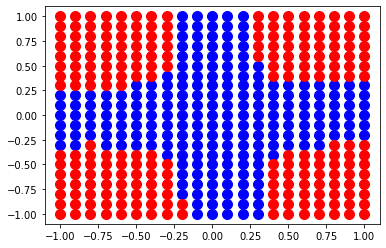

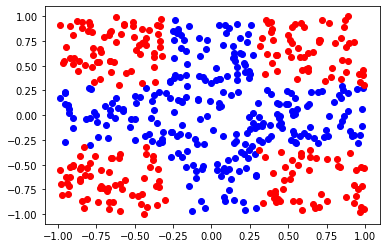

<Figure size 432x288 with 0 Axes>

In [147]:
model = create_mlp_model(my_lib, [2, 4, 1])

train_classification_stochastic_backprop_mlp_model(my_lib, model, X, Y, float(0.005), 100000)

points_x1_blue = []
points_x2_blue = []

points_x1_red = []
points_x2_red = []

for i in range(-10, 11):
    for j in range(-10, 11):
        if predict_mlp_model_classification(my_lib, model, [i/10, j/10]) >= 0:
            points_x1_blue.append(i / 10.0)
            points_x2_blue.append(j / 10.0)
        else:
            points_x1_red.append(i / 10.0)
            points_x2_red.append(j / 10.0)

plt.scatter(points_x1_blue, points_x2_blue, c='blue', s=100)
plt.scatter(points_x1_red, points_x2_red, c='red', s=100)
plt.show()

plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

destroy_mlp_model(my_lib, model)

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [148]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [0, 0, 0]for p in X])

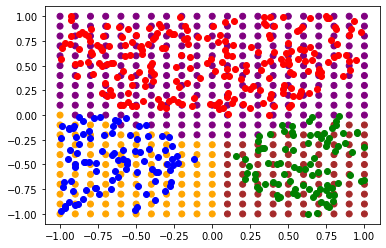

<Figure size 432x288 with 0 Axes>

In [150]:
model = create_mlp_model(my_lib, [2, 3])

train_classification_stochastic_backprop_mlp_model_3_class(my_lib, model, X.flatten(), Y.flatten(), float(0.001), 1000000)

points = [[i / 10.0, j / 10.0] for i in range(-10, 11) for j in range(-10, 11)]

predicted_values = [predict_mlp_model_classification_3_class(my_lib, model, p) for p in points]

classes = [np.argmax(v) for v in predicted_values]

colors = ['orange' if c == 0 else ('purple' if c == 1 else 'brown') for c in classes]

plt.scatter([p[0] for p in points], [p[1] for p in points], c=colors)

plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

destroy_mlp_model(my_lib, model)

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [153]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

In [158]:
model = create_mlp_model(my_lib, [2, 7, 8, 3])

train_classification_stochastic_backprop_mlp_model_3_class(my_lib, model, X.flatten(), Y.flatten(), float(0.0001), 1000000)

points = [[i / 10.0, j / 10.0] for i in range(-10, 11) for j in range(-10, 11)]

predicted_values = [predict_mlp_model_classification_3_class(my_lib, model, p) for p in points]

classes = [np.argmax(v) for v in predicted_values]

colors = ['blue' if c == 0 else ('red' if c == 1 else 'green') for c in classes]

plt.scatter([p[0] for p in points], [p[1] for p in points], c=colors)
plt.show()

plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

destroy_mlp_model(my_lib, model)

KeyboardInterrupt: 

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [174]:
X = np.array([
      [1],
      [2]
])
Y = np.array([
      2,
      3
])

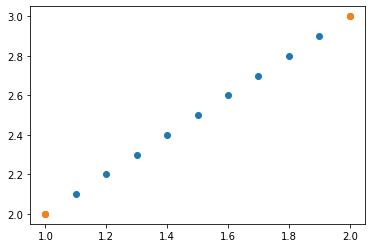

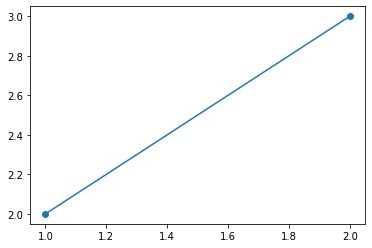

<Figure size 432x288 with 0 Axes>

In [176]:
model, model_size = create_linear_model(my_lib, 1)

train_regression_linear_model(my_lib, model, model_size, X.flatten(), Y)

point_x = []
point_y = []

for i in range(10, 21):
    point_x.append(float(i/10))
    point_y.append(predict_linear_model_regression(my_lib, model, model_size, [i/10]))

plt.scatter(point_x, point_y)

plt.scatter(X,Y)
plt.show()
plt.clf()

destroy_linear_model(my_lib, model, model_size)

model = create_mlp_model(my_lib, [1, 1])

train_regression_stochastic_backprop_mlp_model(my_lib, model, X, Y)

points_x = []
points_y = []

for i in range(10, 21):
    points_x.append(float(i/10))
    points_y.append(predict_mlp_model_regression(my_lib, model, [i/10])[0])

plt.plot(points_x, points_y)

plt.scatter(X,Y)
plt.show()
plt.clf()

destroy_mlp_model(my_lib, model)

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [169]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

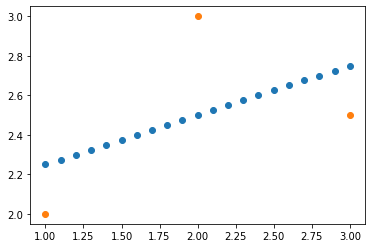

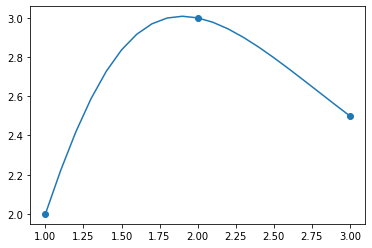

<Figure size 432x288 with 0 Axes>

In [173]:
model, model_size = create_linear_model(my_lib, 1)

train_regression_linear_model(my_lib, model, model_size, X.flatten(), Y)

point_x = []
point_y = []

for i in range(10, 31):
    point_x.append(float(i/10))
    point_y.append(predict_linear_model_regression(my_lib, model, model_size, [i/10]))

plt.scatter(point_x, point_y)

plt.scatter(X,Y)
plt.show()
plt.clf()

destroy_linear_model(my_lib, model, model_size)

model = create_mlp_model(my_lib, [1, 5, 1])

train_regression_stochastic_backprop_mlp_model(my_lib, model, X, Y)

points_x = []
points_y = []

for i in range(10, 31):
    points_x.append(float(i/10))
    points_y.append(predict_mlp_model_regression(my_lib, model, [i/10])[0])

plt.plot(points_x, points_y)

plt.scatter(X,Y)
plt.show()
plt.clf()

destroy_mlp_model(my_lib, model)

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [ ]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      2,
      3,
      2.5
])

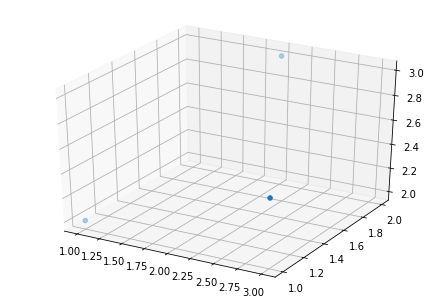

<Figure size 432x288 with 0 Axes>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [ ]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

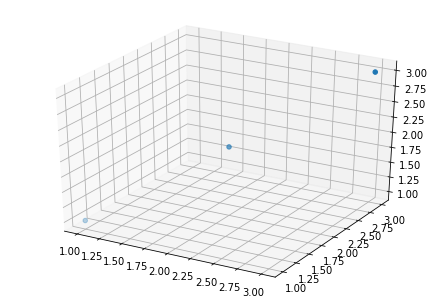

<Figure size 432x288 with 0 Axes>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [ ]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

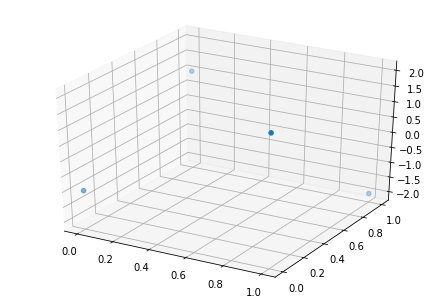

<Figure size 432x288 with 0 Axes>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()